# Fractional optimization

This notebook shows how to solve a simple *concave fractional problem*, in which the objective is to maximize the ratio of a nonnegative concave function and a positive
convex function. Concave fractional problems are quasiconvex programs (QCPs). They can be specified using disciplined quasiconvex programming ([DQCP](https://www.cvxpy.org/tutorial/dqcp/index.html)), and hence can be solved using CVXPY.

In [13]:
!pip install --upgrade cvxpy

Requirement already up-to-date: cvxpy in /usr/local/lib/python3.6/dist-packages (1.0.23)


In [0]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

Our goal is to minimize the function

$$\frac{\sqrt{x}}{\exp(x)}.$$

This function is not concave, but it is quasiconcave, as can be seen by inspecting its graph.

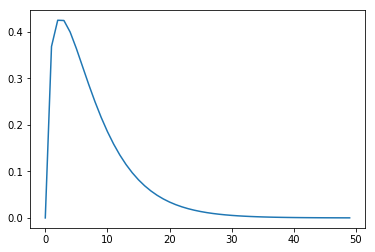

In [15]:
plt.plot([np.sqrt(y) / np.exp(y) for y in np.linspace(0, 10)])
plt.show()

The below code specifies and solves the QCP, using DQCP. The concave fraction function is DQCP-compliant, because the ratio atom is quasiconcave (actually, quasilinear), increasing in the numerator when the denominator is positive, and decreasing in the denominator when the numerator is nonnegative.

In [16]:
x = cp.Variable()
concave_fractional_fn = cp.sqrt(x) / cp.exp(x)
problem = cp.Problem(cp.Maximize(concave_fractional_fn))
assert problem.is_dqcp()
problem.solve(qcp=True)

0.4288821220397949

In [17]:
x.value

array(0.50000165)